<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Silicon_wafer_thickness_anomaly_detection/blob/main/Silicon_wafer_thickness_process_variation_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** Applicable for projects involving process variation anlysis and quality assessment in wafer fabrication

**Description:**

This dataset provides measurements of the thickness of a single wafer, assessed at 9 locations across 184 consecutive batches. It is useful for analyzing variations in wafer thickness during the manufacturing process.

Downloading the dataset and environment setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
url = "https://openmv.net/file/silicon-wafer-thickness.csv"
df = pd.read_csv(url)

In [3]:
df.head(5)

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260


In [4]:
df.shape

(184, 9)

This dataset "Silicon wafer thickness" has 9 columns and 184 rows. It is approximately centered and scaled (i.e. values are transformed) to disguise original units. This data are not in physical units but relative scales. That's okay for variation/anomaly detection.

G1 to G9 are 9 different locations on the wafer.

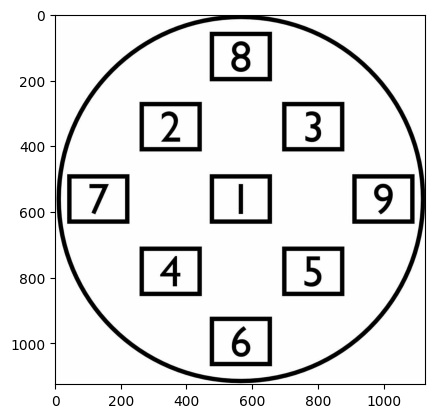

In [5]:
# importing the image for location mapping
import cv2
import urllib.request

# Download the image from the URL
url = 'https://openmv.net/media/datasets/silicon-wafer-thickness-locations.jpg'
urllib.request.urlretrieve(url, 'silicon-wafer-thickness-locations.jpg')

# Read the downloaded image
img = cv2.imread('silicon-wafer-thickness-locations.jpg')

# Convert the image from BGR to RGB as matplotlib interprets images as RGB (Red, Green, Blue)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Display image
plt.imshow(img)

Renaming the column name

In [6]:
df.columns = [f'loc{i+1}'for i in range(9)]
df['batch']  = np.arange(1, len(df)+1)

In [7]:
df

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,batch
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,1
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,2
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,3
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,4
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,5
...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,180
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,181
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,182
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,183


Exploratory data analysis (EDA)

Summary statistics

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loc1,184.0,0.249245,0.720936,-1.171,-0.05300,0.1810,0.49125,7.197
loc2,184.0,0.293576,0.780485,-1.186,-0.06200,0.2355,0.54800,8.060
loc3,184.0,0.351696,0.727749,-0.975,0.04775,0.2840,0.58850,7.223
loc4,184.0,0.316196,0.742577,-1.186,0.02500,0.2880,0.54975,7.589
loc5,184.0,0.302500,0.739370,-1.095,-0.07100,0.2660,0.54075,7.258
loc6,184.0,0.143277,0.923092,-1.252,-0.38350,0.0680,0.48400,8.310
loc7,184.0,0.156185,0.822092,-1.470,-0.26025,-0.0155,0.50150,7.835
loc8,184.0,0.304603,0.901041,-1.283,-0.14425,0.2720,0.72800,8.931
loc9,184.0,0.131821,0.819553,-1.416,-0.36700,0.0090,0.49600,7.824
batch,184.0,92.500000,53.260367,1.000,46.75000,92.5000,138.25000,184.000


This gives mean, std, min, max for each location, and for batch too.

In [9]:
df.isna().sum()

,0
loc1,0
loc2,0
loc3,0
loc4,0
loc5,0
loc6,0
loc7,0
loc8,0
loc9,0
batch,0


It checks the null values in the dataset.

Distributions and outliers

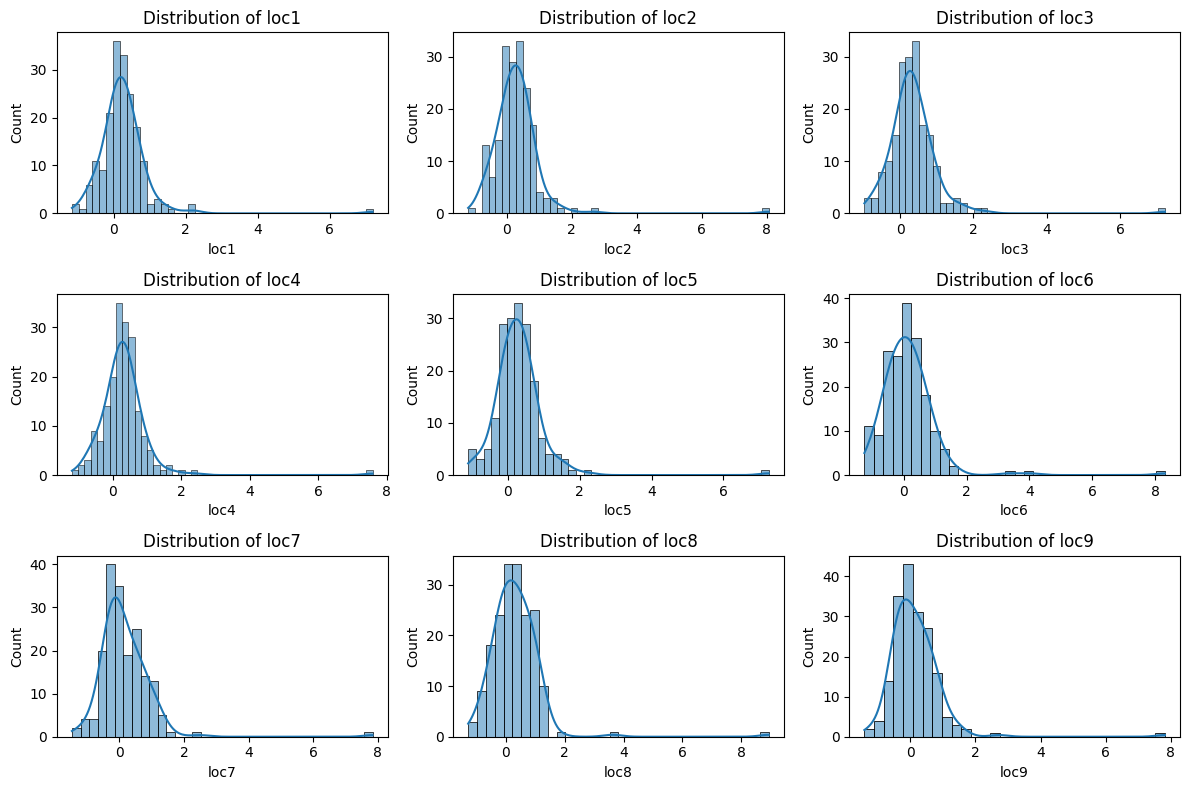

In [10]:
plt.figure(figsize=(12,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  sns.histplot(df[f"loc{i+1}"], kde=True)
  plt.title(f"Distribution of loc{i+1}")
plt.tight_layout()
plt.show()

Boxplots (to see outliers)

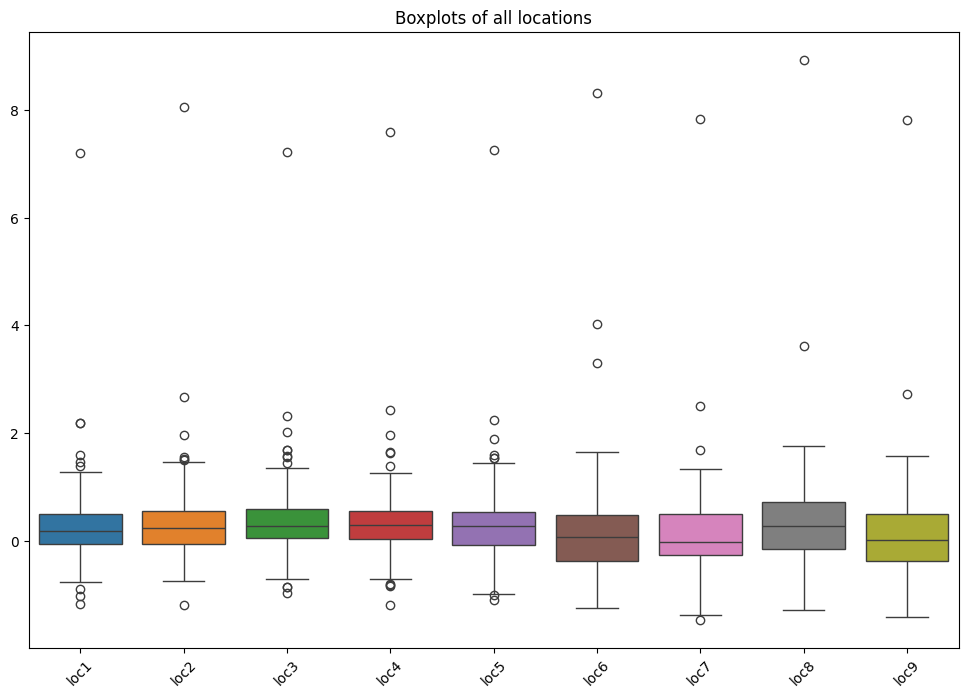

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df[[f'loc{i+1}' for i in range(9)]])
plt.xticks(rotation=45)
plt.title("Boxplots of all locations")
plt.show()

Correlation heatmap among the 9 locations

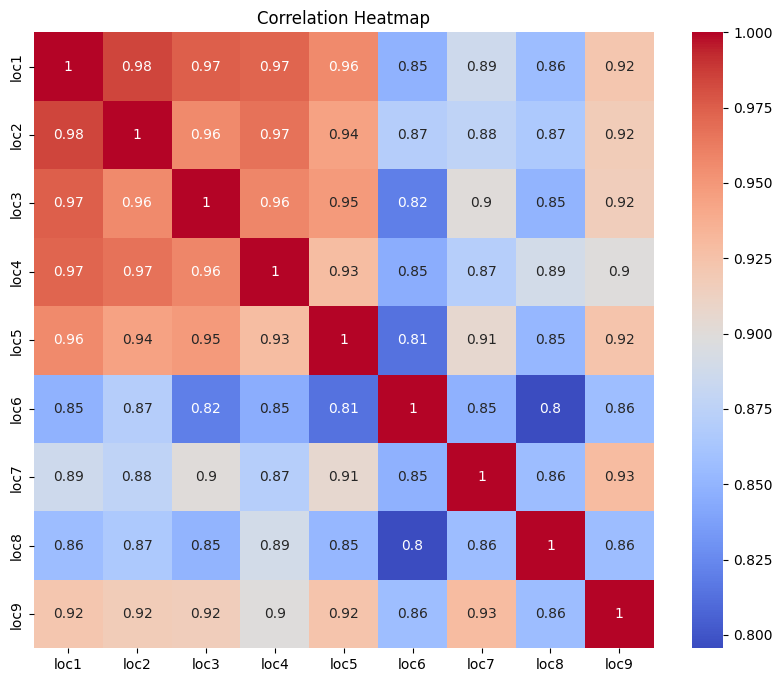

In [12]:
corr = df[[f"loc{i+1}" for i in range(9)]].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Derived batch-level metrics

In [13]:
#Adding features summarizing each wafer/batch:

loc_cols = [f'loc{i+1}' for i in range(9)]
df["mean_thickness"] = df[loc_cols].mean(axis=1)
df["std_thickness"] = df[loc_cols].std(axis=1)
df["range_thickness"] = df[loc_cols].max(axis=1) - df[loc_cols].min(axis=1)
df["cv_thickness"] = df["std_thickness"] / df["mean_thickness"].abs()


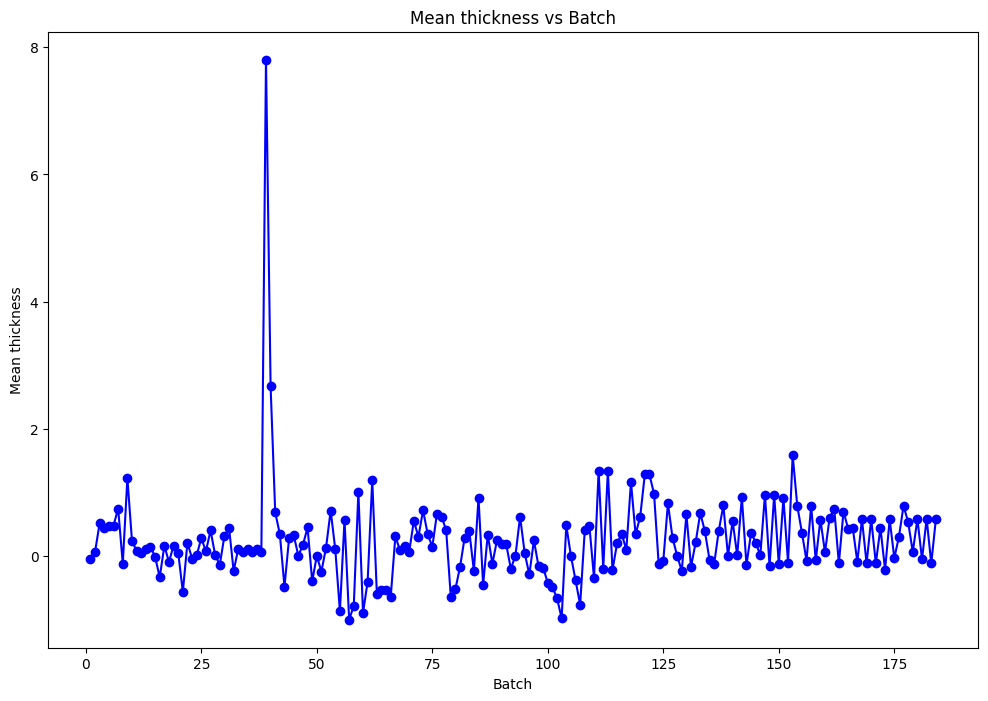

In [14]:
plt.figure(figsize=(12,8))
plt.plot(df["batch"], df['mean_thickness'], marker='o', linestyle='-', color='b', label='Mean Thickness')
plt.title("Mean thickness vs Batch")
plt.xlabel("Batch")
plt.ylabel("Mean thickness")
plt.show()


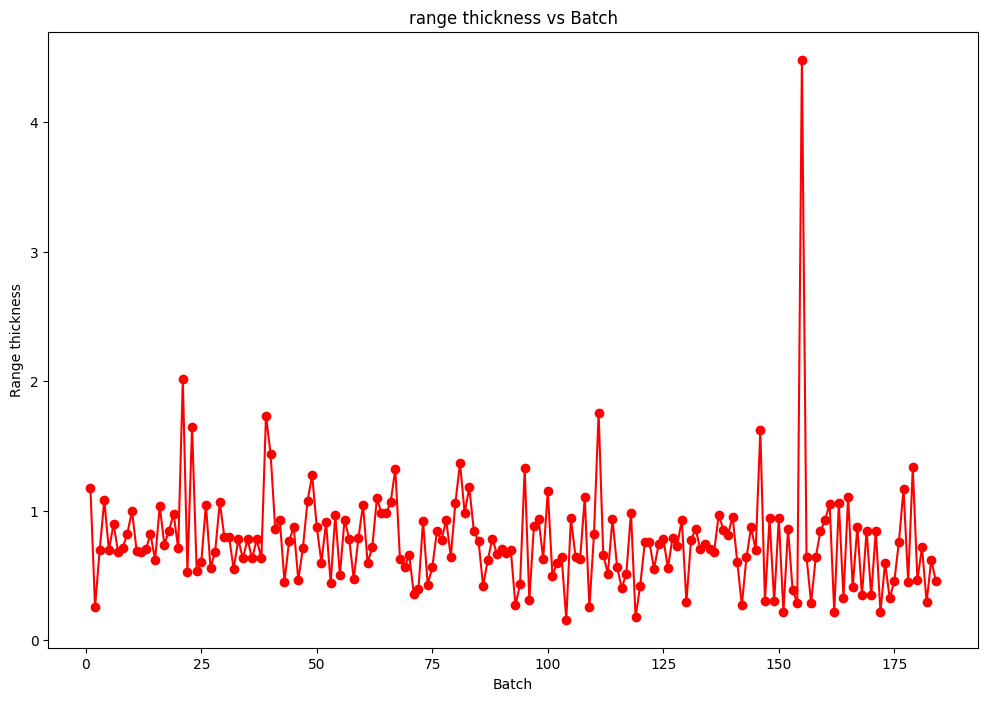

In [15]:
plt.figure(figsize=(12,8))
plt.plot(df["batch"], df['range_thickness'], marker='o', linestyle='-', color='r', label='range Thickness')
plt.title("range thickness vs Batch")
plt.xlabel("Batch")
plt.ylabel("Range thickness")
plt.show()

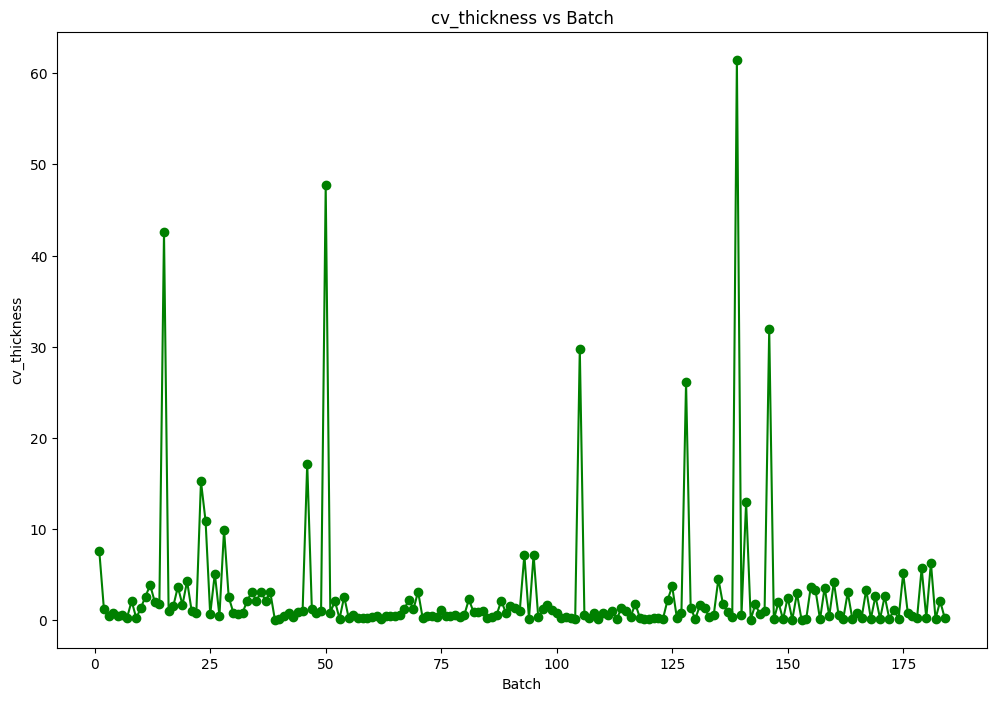

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df["batch"], df['cv_thickness'], marker='o', linestyle='-', color='g', label='cv_thickness')
plt.title("cv_thickness vs Batch")
plt.xlabel("Batch")
plt.ylabel("cv_thickness")
plt.show()

we can see drift, spikes, or clusters of high variation.

Dimensionality reduction: PCA
Because 9 measurement locations are correlated, PCA can help find principal directions of variation.

In [17]:
from sklearn.decomposition import PCA
X = df[loc_cols].values
pca = PCA(n_components=2)
pcs = pca.fit_transform(X)
print('Explainned variance ratios:', pca.explained_variance_ratio_)

Explainned variance ratios: [0.89993874 0.03280568]


PC1 explained 90% of the variance in the data and PC2 explained 3% variance in the data.

In [18]:
df["PC1"] = pcs[:,0]
df["PC2"] = pcs[:,1]

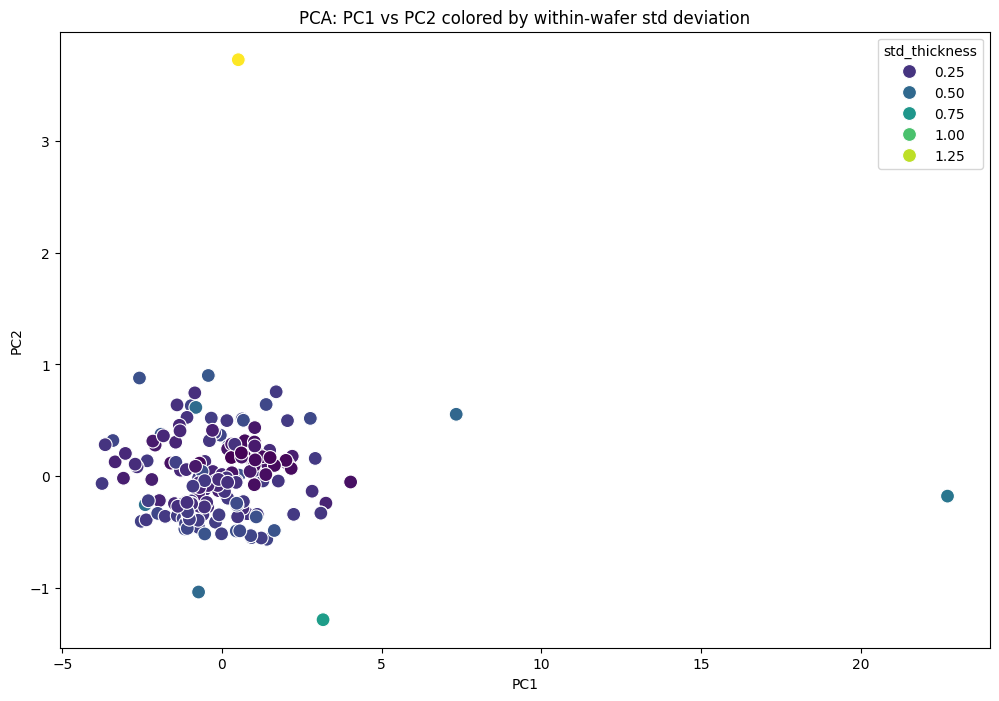

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="PC1",y="PC2", data=df, hue="std_thickness", palette="viridis", s=100)
plt.title("PCA: PC1 vs PC2 colored by within-wafer std deviation")
plt.show()

In [20]:
pca.components_

array([[ 0.30862319,  0.33394263,  0.30842809,  0.31571704,  0.31173476,
         0.36699097,  0.34045005,  0.36263593,  0.34519115],
       [-0.18404182, -0.10500669, -0.24903899, -0.18605891, -0.24421008,
         0.87511783,  0.08876915, -0.15637593,  0.02570421]])

The first component (PC1) represent the "mean thickness direction" and second PC2 might capture variation pattern.

**Anomaly detection / outlier detection**

because this is a process monitoring scenario, used to detect abnormal wafers/batches.

**1) Isolation Forest (unsupervised)**

In [24]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.03, random_state=42) #assume 3% anomalies
df["iso_label"] = iso.fit_predict(X)  # X = df[loc_col].values, returns -1 for anomaly, +1 for normal
df["iso_score"] = iso.decision_function(X)


In [25]:
df

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,batch,mean_thickness,std_thickness,range_thickness,cv_thickness,PC1,PC2,iso_label,iso_score
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,1,-0.046444,0.351224,1.174,7.562239,-0.900190,-0.228801,1,0.192554
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,2,0.072000,0.086559,0.255,1.202212,-0.534906,0.007083,1,0.242771
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,3,0.522667,0.249600,0.692,0.477550,0.787689,-0.337437,1,0.192904
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,4,0.440222,0.368167,1.082,0.836320,0.538060,0.008275,1,0.155052
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,5,0.476333,0.222973,0.694,0.468102,0.653489,-0.289733,1,0.205798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,180,0.587556,0.148208,0.466,0.252245,1.025569,0.268581,1,0.216155
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,181,-0.044667,0.281708,0.716,6.306900,-0.909960,-0.091037,1,0.200983
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,182,0.590778,0.090689,0.292,0.153507,1.039628,0.144545,1,0.216198
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,183,-0.111667,0.235402,0.621,2.108076,-1.096550,-0.236271,1,0.234610


Get anomalies:

In [26]:
anoms = df[df['iso_label']==-1]
print("Anomalus batches by IsolationForest:", anoms["batch"].tolist())

Anomalus batches by IsolationForest: [39, 40, 60, 103, 111, 153]


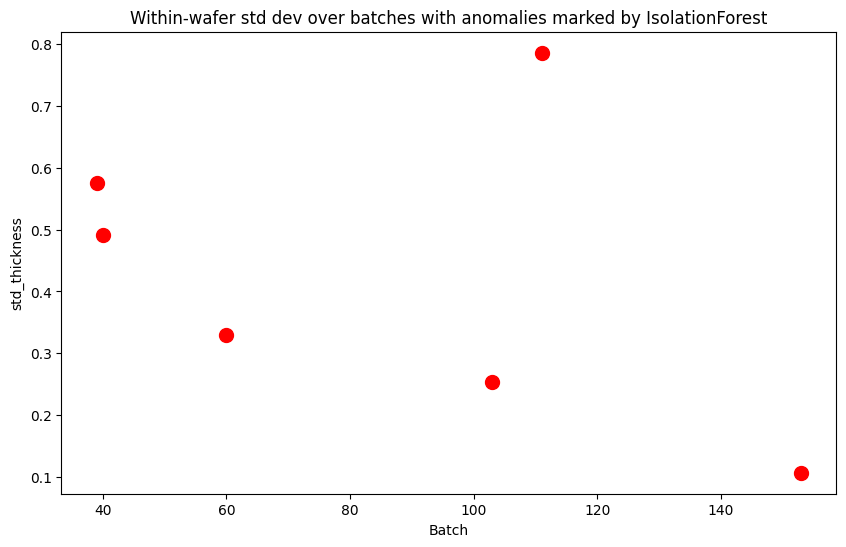

In [34]:
# Visulazing the standard deviation anomalies
plt.figure(figsize=(10,6))
plt.scatter(anoms["batch"],anoms["std_thickness"], color = 'red', label="anomaly",s=100)
plt.title("Within-wafer std dev over batches with anomalies marked by IsolationForest")
plt.xlabel("Batch")
plt.ylabel("std_thickness")
plt.show()

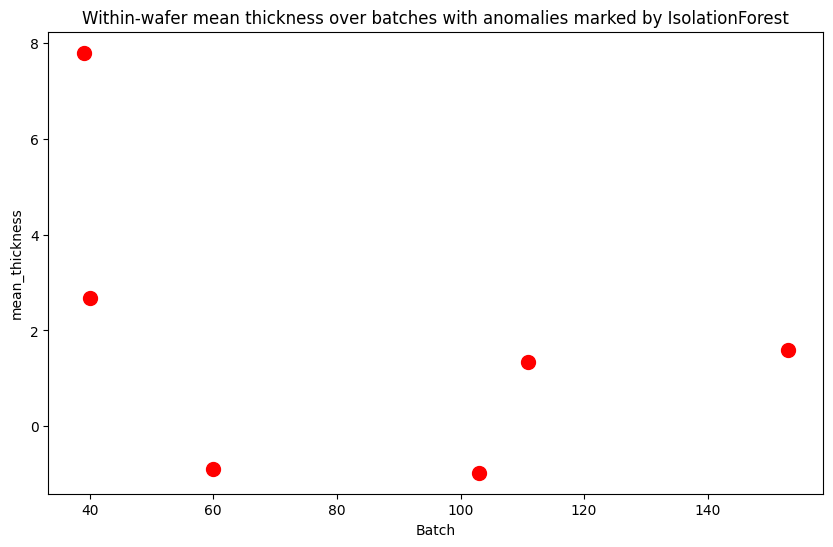

In [35]:
# Visulazing the mean thickness anomalies
plt.figure(figsize=(10,6))
plt.scatter(anoms["batch"],anoms["mean_thickness"], color = 'red', label="anomaly",s=100)
plt.title("Within-wafer mean thickness over batches with anomalies marked by IsolationForest")
plt.xlabel("Batch")
plt.ylabel("mean_thickness")
plt.show()

**2) Use PCA residuals: measure distance from projection onto first few PCs.**

PCA residuals?
When we project data onto the first few principal components (PCs), you're approximating the original data in a lower-dimensional subspace.

Residuals = Original data – Reconstructed (projected) data

Residual norm = Distance between original and projected data

Large residuals suggest the data point does not fit well in the lower-dimensional subspace → possible anomaly

In [36]:
# Reconsruct data from PCA projection
X_Projected = pca.inverse_transform(pcs)

# computing PCA residuals (using Euclidean distance between original and projected)
residuals = np.linalg.norm(X-X_Projected, axis=1)
df["pca_residual"] = residuals

In [37]:
df

,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,batch,mean_thickness,std_thickness,range_thickness,cv_thickness,PC1,PC2,iso_label,iso_score,pca_residual
0,0.175,0.188,-0.159,0.095,0.374,-0.238,-0.800,0.158,-0.211,1,-0.046444,0.351224,1.174,7.562239,-0.900190,-0.228801,1,0.192554,0.817005
1,0.102,0.075,0.141,0.180,0.138,-0.057,-0.075,0.072,0.072,2,0.072000,0.086559,0.255,1.202212,-0.534906,0.007083,1,0.242771,0.156603
2,0.607,0.711,0.879,0.765,0.592,0.187,0.431,0.345,0.187,3,0.522667,0.249600,0.692,0.477550,0.787689,-0.337437,1,0.192904,0.461857
3,0.774,0.823,0.619,0.370,0.725,0.439,-0.025,-0.259,0.496,4,0.440222,0.368167,1.082,0.836320,0.538060,0.008275,1,0.155052,1.043786
4,0.504,0.644,0.845,0.681,0.502,0.151,0.404,0.296,0.260,5,0.476333,0.222973,0.694,0.468102,0.653489,-0.289733,1,0.205798,0.413415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.535,0.524,0.649,0.475,0.486,0.657,0.941,0.527,0.494,180,0.587556,0.148208,0.466,0.252245,1.025569,0.268581,1,0.216155,0.467531
180,0.041,0.056,0.194,0.234,-0.003,-0.310,0.267,-0.449,-0.432,181,-0.044667,0.281708,0.716,6.306900,-0.909960,-0.091037,1,0.200983,0.701426
181,0.507,0.563,0.539,0.634,0.471,0.578,0.686,0.763,0.576,182,0.590778,0.090689,0.292,0.153507,1.039628,0.144545,1,0.216198,0.280880
182,-0.033,-0.025,0.118,0.148,-0.076,-0.403,-0.345,0.084,-0.473,183,-0.111667,0.235402,0.621,2.108076,-1.096550,-0.236271,1,0.234610,0.336379


Analyze:
 High residuals may indicate outliers or batches with unique thickness patterns


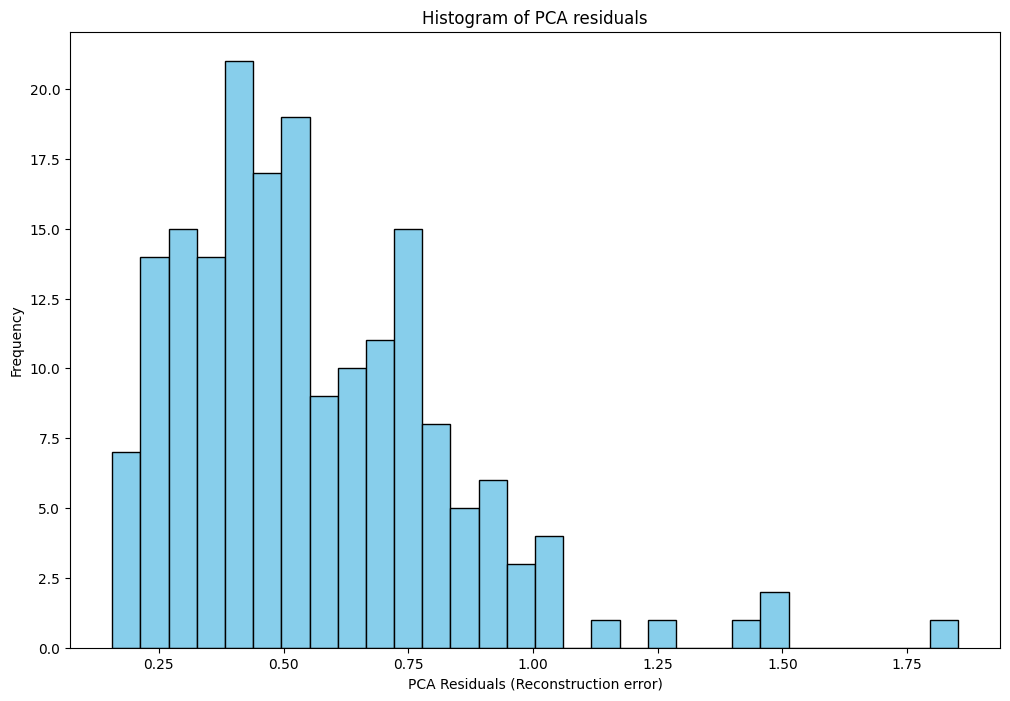

In [40]:
# visualinging
plt.figure(figsize=(12,8))
plt.hist(df["pca_residual"], bins=30, color="skyblue", edgecolor="black")
plt.title("Histogram of PCA residuals")
plt.xlabel("PCA Residuals (Reconstruction error)")
plt.ylabel("Frequency")
plt.show()

Key Observations:
1) Most residuals are clustered around 0.3-0.7.
2) There is long tail to the right, with a few points having residuals upto 1.8.
3) This is right skewed distribution typical when most data points fits the PCA model well and a few data points don't confrom i.e. possible anomalies
4) The highest bars are around 0.4-0.5, indicating this is the most common residual size.
5) A small number of samples with residuals > 1.0, including 1 near 1.8, these are prime candidates for further inspection. They are possibly due to Noise, process drift, faulty measurements etc.

In [44]:
# Threshold for high residuals
threshold = df["pca_residual"].mean() + 2*df["pca_residual"].std()
outliers = df[df["pca_residual"]> threshold]
print("Anomalous batches by PCA residuals:", outliers["batch"].tolist())

Anomalous batches by PCA residuals: [21, 23, 49, 67, 111, 155]


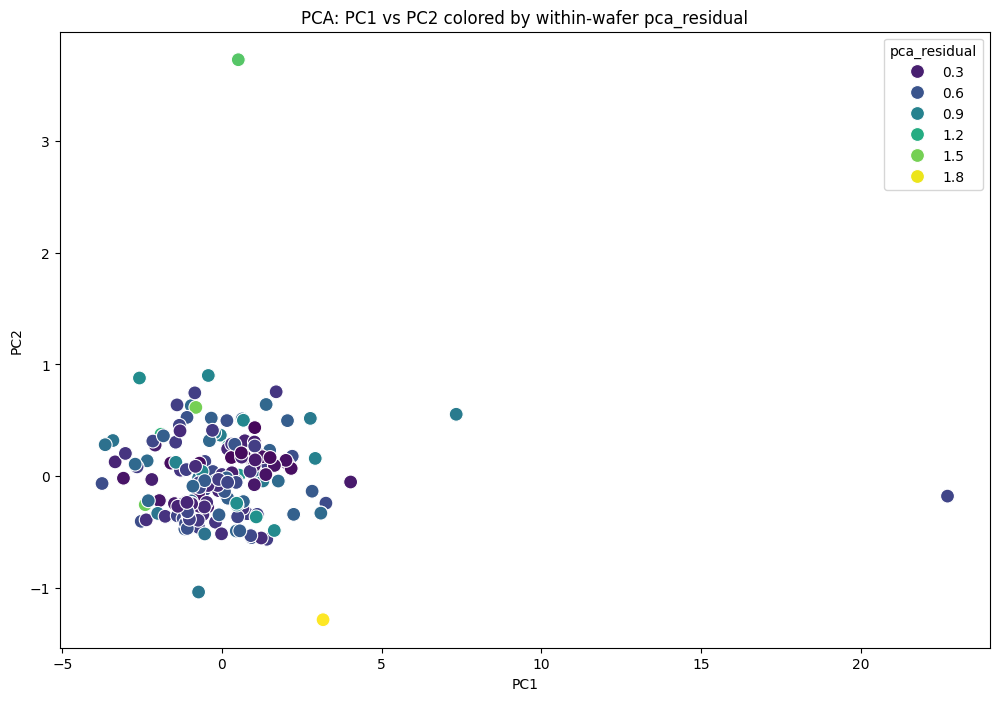

In [45]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="PC1",y="PC2", data=df, hue="pca_residual", palette="viridis", s=100)
plt.title("PCA: PC1 vs PC2 colored by within-wafer pca_residual")
plt.show()

**3) Robust Mahalanobis distance**

In [46]:
from scipy.stats import chi2
import numpy.linalg as la

cov = np.cov(X, rowvar=False)
inv_cov = la.inv(cov)
mean_vec = X.mean(axis=0)

def mahalanobis(x):
    d = x - mean_vec
    return np.sqrt(d.dot(inv_cov).dot(d.T))

df["mahal_dist"] = df[loc_cols].apply(lambda row: mahalanobis(row.values), axis=1)


In [60]:
# For 9 dims, at significance level α (considering 95% confidence level), threshold = sqrt(χ² quantile)
alpha = 0.05
thr = np.sqrt(chi2.ppf(1 - alpha, df=9))
print("Mahalanobis threshold (α=0.05):", thr)

df["mahal_anom"] = df["mahal_dist"] > thr
print("Mahalanous anomalies:", df[df["mahal_anom"]]["batch"].tolist())


Mahalanobis threshold (α=0.05): 4.1132684819520895
Mahalanous anomalies: [21, 23, 26, 39, 40, 48, 49, 50, 54, 60, 65, 66, 67, 95, 108, 111, 118, 155]


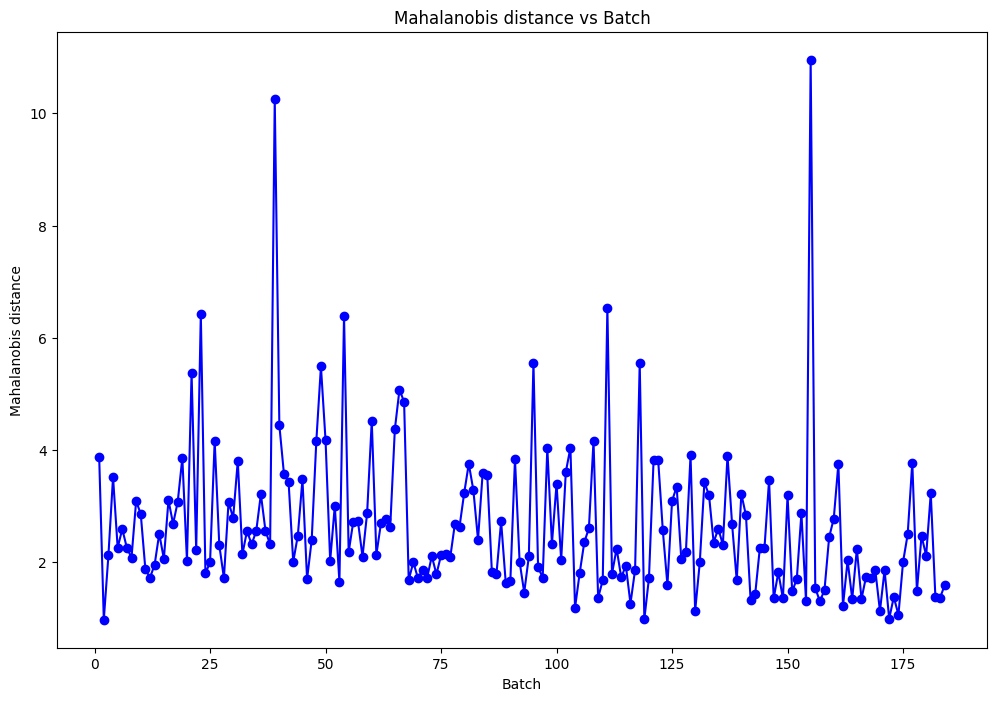

In [61]:
# Plotting mahal_dist over batch
plt.figure(figsize=(12,8))
plt.plot(df["batch"], df["mahal_dist"], marker='o', linestyle='-', color='b', label='mahal_dist')
plt.title("Mahalanobis distance vs Batch")
plt.xlabel("Batch")
plt.ylabel("Mahalanobis distance")
plt.show()

Control Chart Approach

To measure anomaly using Statistical process control (SPC), need to setup control charts for batch level metrics (e.g mean thickness, standard deviation).

For mean thickness, compute baseline mean & standard deviation from ealry batches (for ex first 30-50)
Set control limits (±3 sigma) and monitor whether subsequent batches exceed them.

In [56]:
baseline = df.iloc[:50]
mu0 = baseline['mean_thickness'].mean()
sigmo0 = baseline['mean_thickness'].std()

df['UCL_mean'] = mu0 + 2*sigmo0
df['LCL_mean'] = mu0 - 2*sigmo0


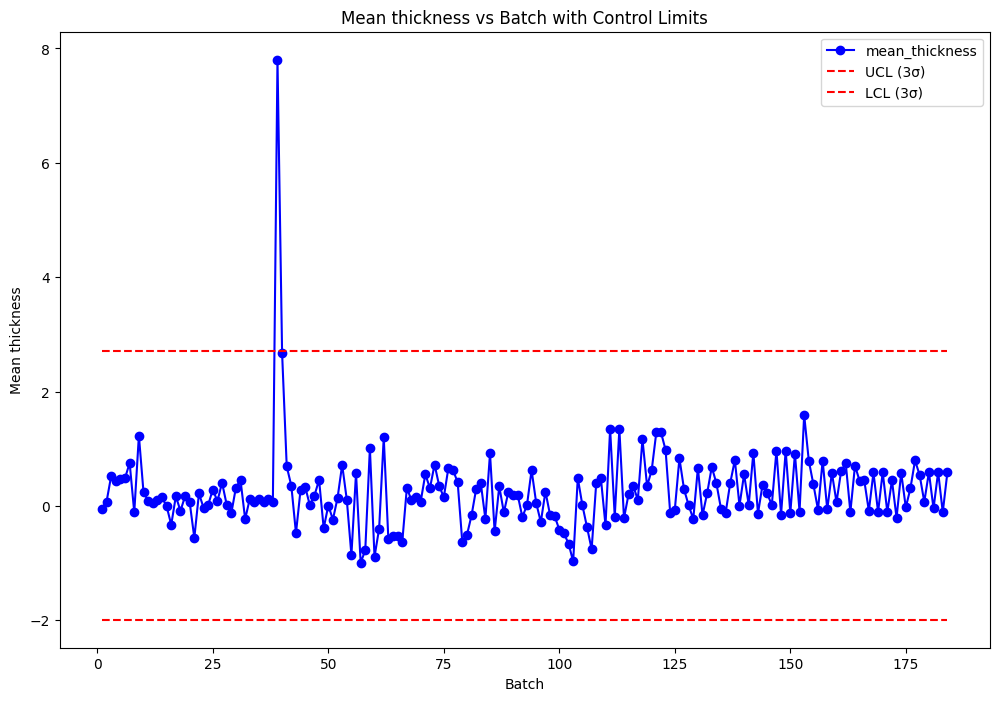

In [57]:
# Visualizing
plt.figure(figsize=(12,8))
plt.plot(df["batch"], df["mean_thickness"], marker='o', color='b', label='mean_thickness')
plt.plot(df["batch"], df["UCL_mean"], linestyle='--', color='r', label='UCL (3σ)')
plt.plot(df["batch"], df["LCL_mean"], linestyle='--', color='r', label='LCL (3σ)')
plt.title("Mean thickness vs Batch with Control Limits")
plt.xlabel("Batch")
plt.ylabel("Mean thickness")
plt.legend()
plt.show()

If a batch goes outside the control limits, it will consider as a signal of "out of contrl".

In [58]:
# Printing anomalies
df['SPC'] = (df['mean_thickness'] > df['UCL_mean']) | (df['mean_thickness'] < df['LCL_mean'])
print("Anomalies by SPC:", df[df['SPC']]['batch'].tolist())

Anomalies by SPC: [39]


Comparing anomalies by different methods:

| **Batch** | **IsolationForest** | **PCA Residuals** | **Mahalanobis** | **SPC** |
| --------- | ------------------- | ----------------- | --------------- | ------- |
| 21        |                     | ✅                 | ✅               |         |
| 23        |                     | ✅                 | ✅               |         |
| 39        | ✅                   |                   | ✅               | ✅       |
| 40        | ✅                   |                   |                 |         |
| 49        |                     | ✅                 | ✅               |         |
| 54        |                     |                   | ✅               |         |
| 60        | ✅                   |                   |                 |         |
| 66        |                     |                   | ✅               |         |
| 67        |                     | ✅                 | ✅               |         |
| 95        |                     |                   | ✅               |         |
| 103       | ✅                   |                   |                 |         |
| 111       | ✅                   | ✅                 | ✅               |         |
| 118       |                     |                   | ✅               |         |
| 153       | ✅                   |                   |                 |         |
| 155       |                     | ✅                 | ✅               |         |
